<a href="https://colab.research.google.com/github/vidaldurazo/machinelearningpython/blob/main/DemoDay_Machine_Learning_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Dataset

**Descripción:**

la presente dataset recopila las condiciones climatológicas (*Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall*) de la ciudad de Seoul, Korea, y el uso de las bicicletas públicas rentadas en diferentes puntos de la ciudad

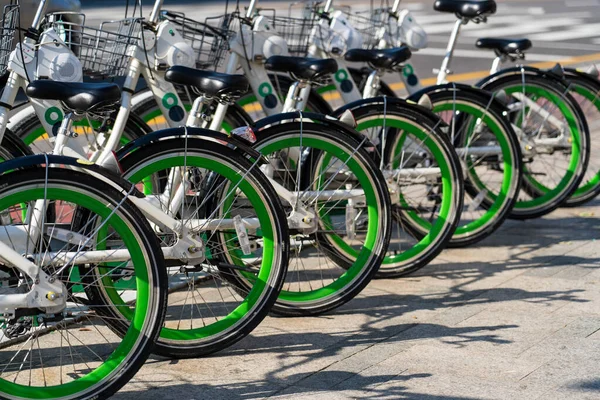

fuente: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction


Objetivo: identificar un modelo de predicción apropiado de la demanada




# Setup

**Bibliotecas**

primero importamos las bibliotecas necesarias para la organización de los datos y hacemos la importación del csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RAWcsv = pd.read_csv('/content/drive/MyDrive/Clases/BEDU/Data science/3 - Python/DemoDay/SeoulBikeData-1.csv', encoding= 'unicode_escape')
RAWcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m-s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ-m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Revisión inicial**
procedemos a revisar superficialmente el df

In [ ]:
RAWcsv.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m-s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ-m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
RAWcsv.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m-s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ-m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
RAWcsv.shape

(8760, 14)

se observa que la fuente no posee ningún valor nulo, el dataframe consta de 8760 observaciones, habrá que revisar los tipos de las variables para que el análisis sea adecuado

# Casting

**análsis de variables**

se realiza la revisión de cada variable para confirmar que su tipo sea el adecuado

In [ ]:
RAWcsv.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m-s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ-m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

vemos que la variable "date" no es las adecuada para los tipos que se muestran en el df, por lo tanto se procede a modificarla:

In [ ]:
RAWcsv_1 = RAWcsv
RAWcsv_1['Date'] = pd.to_datetime(RAWcsv_1['Date'])

In [ ]:
RAWcsv_1.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m-s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ-m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

convertimos las variables categóricas en categorías numéricas

In [ ]:
RAWcsv_1['Functioning Day'] = RAWcsv_1['Functioning Day'].map({'Yes':1,'No':0})
RAWcsv_1['Holiday'] = RAWcsv_1['Holiday'].map({'No Holiday':0,'Holiday':1})

# Plots generales

realizamos un scatterplot para ver la distribución de horas y bicicletas rentadas

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

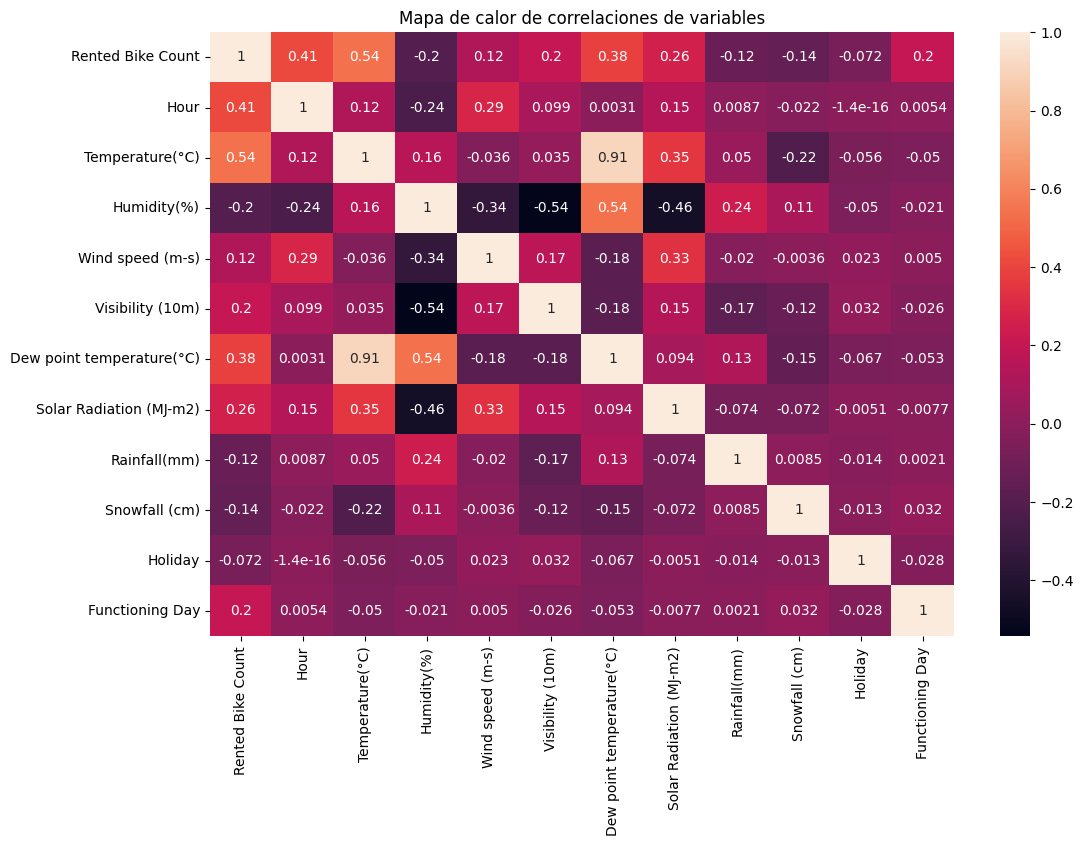

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(RAWcsv_1.corr(),annot=True).set_title("Mapa de calor de correlaciones de variables")

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

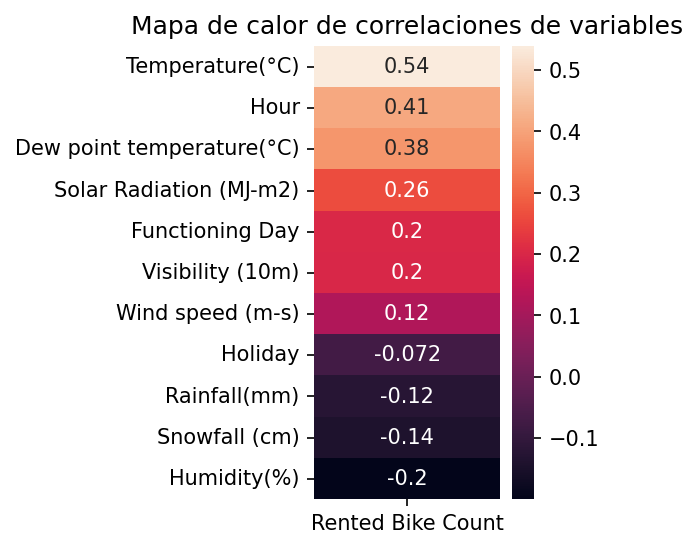

In [ ]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(RAWcsv_1.corr()[["Rented Bike Count"]].sort_values("Rented Bike Count", ascending=False)[1:],annot=True).set_title("Mapa de calor de correlaciones de variables")

en términos generales, vemos un nivel de correlación bajo entre las variables, sin embargo, podemos ver que el nivel de temperatura tiene cierta correlación con el consumo de servicios, ahora analizaremos el comportamiento de cada variable de manera individual

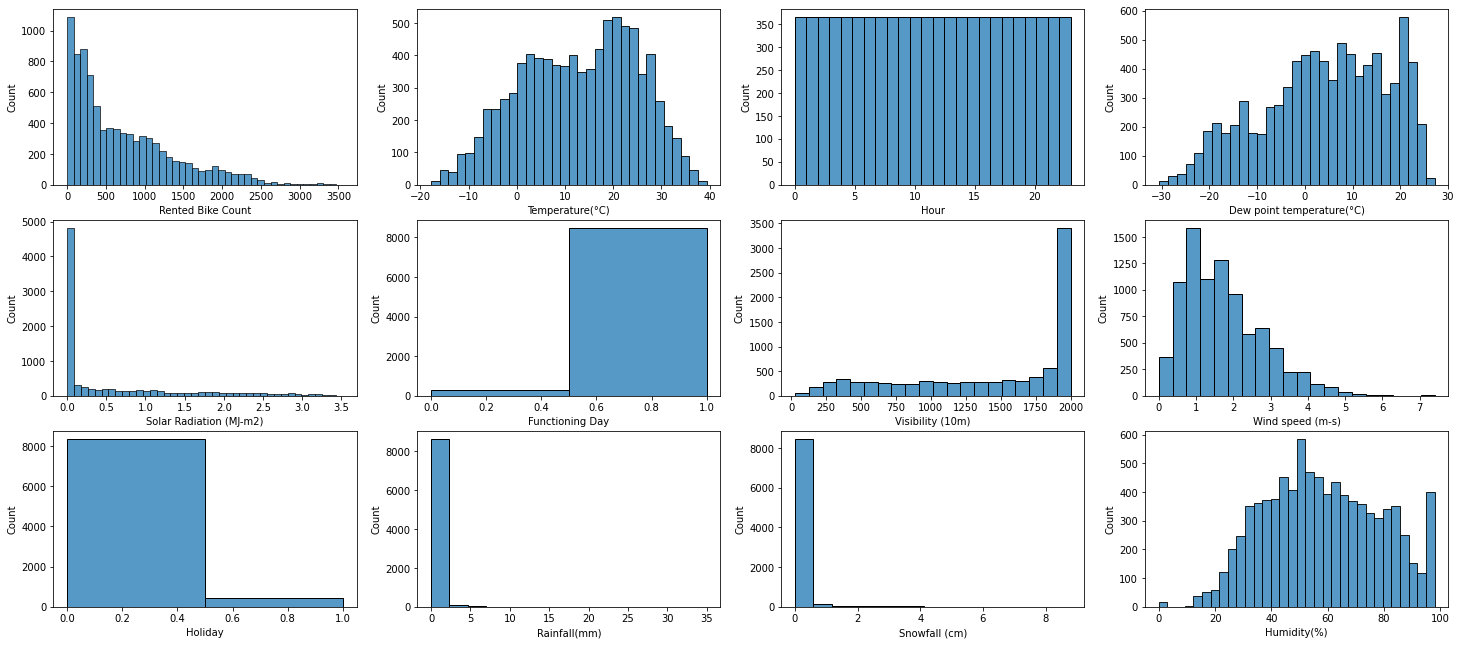

In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=4,squeeze=100, figsize=(25,11))
sns.histplot(data=RAWcsv_1["Rented Bike Count"],ax=axs[0,0])
sns.histplot(data=RAWcsv_1["Temperature(°C)"],ax=axs[0,1])
sns.histplot(data=RAWcsv_1["Hour"], bins=24, ax=axs[0,2])
sns.histplot(data=RAWcsv_1["Dew point temperature(°C)"], ax=axs[0,3]) 
sns.histplot(data=RAWcsv_1["Solar Radiation (MJ-m2)"], ax=axs[1,0])
sns.histplot(data=RAWcsv_1["Functioning Day"],bins=2, ax=axs[1,1])
sns.histplot(data=RAWcsv_1["Visibility (10m)"], ax=axs[1,2])
sns.histplot(data=RAWcsv_1["Wind speed (m-s)"], bins=20, ax=axs[1,3])
sns.histplot(data=RAWcsv_1["Holiday"], bins=2, ax=axs[2,0])
sns.histplot(data=RAWcsv_1["Rainfall(mm)"], ax=axs[2,1])
sns.histplot(data=RAWcsv_1["Snowfall (cm)"], ax=axs[2,2])
sns.histplot(data=RAWcsv_1["Humidity(%)"], ax=axs[2,3])


las variables: Solar radiation, Rainfall y Snowfall, tienen poca frecuencia cuando son mayores a cero, por lo que se clasifica en una variable binaria: 0 cuando no hay presencia de radiación solar/lluvia/nieve y 1 cuando existe presencia de radiación solar/lluvia/nieve; por otro lado, la variable "visibility" presenta un comportamiento parecido, los valores bajos son muy poco frecuentes, por lo que también haremos esta variable binaria a partir del valor 2000 quees el valor donde existe plena visibilidad, por lo que quedaría: 0 cuando hay poca o nula visibilidad y 1 cuando hay completa visibilidad

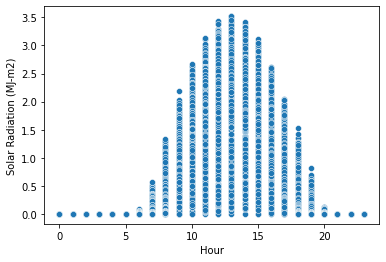

In [ ]:
sns.scatterplot(y=RAWcsv_1["Solar Radiation (MJ-m2)"], x=RAWcsv_1["Hour"])

In [ ]:
RAWcsv_2 = RAWcsv_1
RAWcsv_2['Visibility']=RAWcsv_1['Visibility (10m)'].apply(lambda x: 1 if x >= 2000 else 0)
RAWcsv_2['Rainfall']=RAWcsv_1['Rainfall(mm)'].apply(lambda x:1 if x > 0 else 0)
RAWcsv_2['Snowfall']=RAWcsv_1['Snowfall (cm)'].apply(lambda x:1 if x > 0 else 0)
RAWcsv_2['SolarRadiation']=RAWcsv_1['Solar Radiation (MJ-m2)'].apply(lambda x:1 if x > 0 else 0)
RAWcsv_2.drop(["Visibility (10m)",'Rainfall(mm)','Snowfall (cm)','Snowfall (cm)','Solar Radiation (MJ-m2)'],axis=1,inplace=True)
RAWcsv_2.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m-s)  Dew point temperature(°C) Seasons  Holiday  \
0               2.2                      -17.6  Winter        0   
1               0.8                      -17.6  Winter        0   
2               1.0                      -17.7  Winter        0   
3               0.9                      -17.6  Winter        0   
4               2.3                      -18.6  Winter        0   

   Functioning Day  Visibility  Rainfall  Snowfall  SolarRadiation  
0                1           1         0         0               0  
1                1           1         0         0               0  
2                1           1         0         0               0  
3                1           1         0         0               0  
4                1           1         0         0               0

In [ ]:
RAWcsv_2.groupby("Functioning Day")["Rented Bike Count"].sum()

Functioning Day
0          0
1    6172314
Name: Rented Bike Count, dtype: int64

anteriormente podemos corroborar de que no existan bicicletas rentadas en días no laborados, por lo tanto eliminaremos los datos donde Functioning Day = 0

In [ ]:
RAWcsv_2=RAWcsv_2[RAWcsv_2['Functioning Day']!=0]

In [ ]:
RAWcsv_2['Functioning Day'].unique()

array([1])

In [ ]:
RAWcsv_2.drop(['Functioning Day'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,hue=hue,data=RAWcsv_2,errwidth=0);

se crea una función que permita crear varias barplots rápidamente

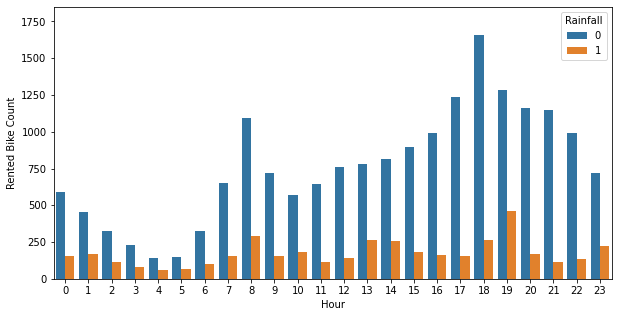

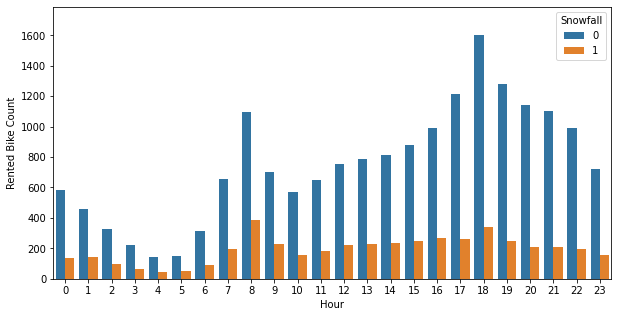

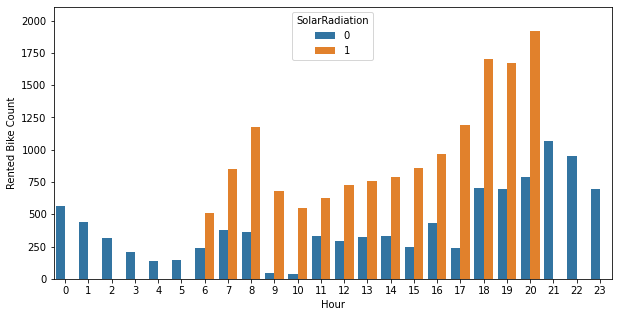

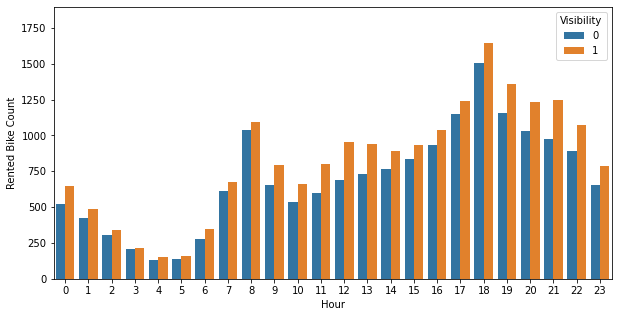

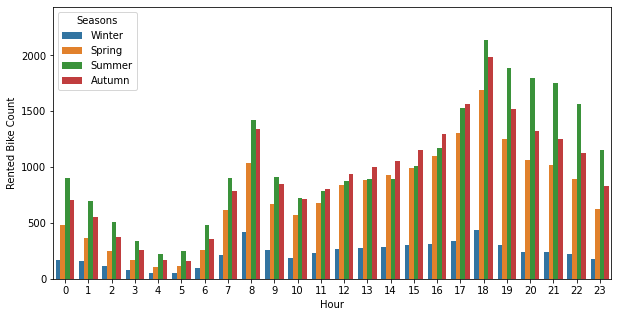

In [ ]:
hue=['Rainfall','Snowfall','SolarRadiation','Visibility','Seasons']
for i in hue:
    barplots('Hour','Rented Bike Count',i)
    plt.show()

se puede observar ciertas diferencias al comparar la demanda del servicio con respecto a la presencia o ausencia de ciertas condiciones climáticas: lluvia, nieve, radiación; también podemos ver como la demanda cambia drásticamente en invierno.

#Ajustes de dataframe para regresiones

a continuación, separaremos la variable Date en Día/Mes/Año

In [ ]:
RAWcsv_2['Día']=RAWcsv_2['Date'].dt.day
RAWcsv_2['Mes']=RAWcsv_2['Date'].dt.month
RAWcsv_2['Año']=RAWcsv_2['Date'].dt.year
RAWcsv_2.drop(['Date'],axis=1,inplace=True)
RAWcsv_2.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m-s)  \
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Dew point temperature(°C) Seasons  Holiday  Visibility  Rainfall  \
8755                      -10.3  Autumn        0           0         0   
8756                       -9.9  Autumn        0           1         0   
8757                       -9.9  Autumn        0           0         0   
8758                       -9.8  Autumn        0           0         0   
8759                       -9.3  Autumn        0           0         0   

      Snowfall  SolarRadiation  Día  Mes   Año  
8755         0               0   30   11  2018  
8756         0               0   30   11  2018  
8757         0               0   30   11  2018  
8758         0               0   30   11  2018  
8759         0               0   30   11  2018

Para normalizar la variable "Seasons", divideremos a ésta en 4 variables con respuesta dicotómica para poder realizar análisis posterior

In [ ]:
RAWcsv_2['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
RAWcsv_2['Verano']=RAWcsv_2['Seasons'].map({'Summer':1,'Winter':0,'Spring':0,'Autumn':0})
RAWcsv_2['Primavera']=RAWcsv_2['Seasons'].map({'Summer':0,'Winter':0,'Spring':1,'Autumn':0})
RAWcsv_2['Otoño']=RAWcsv_2['Seasons'].map({'Summer':0,'Winter':0,'Spring':0,'Autumn':1})
RAWcsv_2['Invierno']=RAWcsv_2['Seasons'].map({'Summer':0,'Winter':1,'Spring':0,'Autumn':0})
RAWcsv_2.drop(['Seasons'],axis = 1, inplace=True)
RAWcsv_2.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m-s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Dew point temperature(°C)  Holiday  Visibility  Rainfall  Snowfall  \
0                      -17.6        0           1         0         0   
1                      -17.6        0           1         0         0   
2                      -17.7        0           1         0         0   
3                      -17.6        0           1         0         0   
4                      -18.6        0           1         0         0   

   SolarRadiation  Día  Mes   Año  Verano  Primavera  Otoño  Invierno  
0               0   12    1  2017       0          0      0         1  
1               0   12    1  2017       0          0      0         1  
2               0   12    1  2017       0          0      0         1  
3               0   12    1  2017       0          0      0         1  
4               0   12    1  2017       0          0      0         1

se renombran las columnas para facilidad de lectura

In [ ]:
RAWcsv_2.rename(columns = {'Rented Bike Count':'Bicicletas rentadas', 
                           'Hour':'Hora',
                           'Temperature(°C)':'Temperatura',
                           'Humidity(%)':'Humedad',
                           'Wind speed (m-s)':'Veloc.Viento',
                           'Dew point temperature(°C)':'Punto de rocío',
                           'Holiday':'Día festivo',
                           'Visibility':'Visibilidad',
                           'Rainfall':'Lluvia',
                           'Snowfall':'Nieve',
                           'SolarRadiation':'Radiación Solar'
                           }, inplace = True)
RAWcsv_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Bicicletas rentadas  Hora  Temperatura  Humedad  Veloc.Viento  \
0                  254     0         -5.2       37           2.2   
1                  204     1         -5.5       38           0.8   
2                  173     2         -6.0       39           1.0   
3                  107     3         -6.2       40           0.9   
4                   78     4         -6.0       36           2.3   

   Punto de rocío  Día festivo  Visibilidad  Lluvia  Nieve  Radiación Solar  \
0           -17.6            0            1       0      0                0   
1           -17.6            0            1       0      0                0   
2           -17.7            0            1       0      0                0   
3           -17.6            0            1       0      0                0   
4           -18.6            0            1       0      0                0   

   Día  Mes   Año  Verano  Primavera  Otoño  Invierno  
0   12    1  2017       0          0      0         1  
1   12    1  2017       0          0      0         1  
2   12    1  2017       0          0      0         1  
3   12    1  2017       0          0      0         1  
4   12    1  2017       0          0      0         1

In [ ]:
RAWcsv_2.columns

Index(['Bicicletas rentadas', 'Hora', 'Temperatura', 'Humedad', 'Veloc.Viento',
       'Punto de rocío', 'Día festivo', 'Visibilidad', 'Lluvia', 'Nieve',
       'Radiación Solar', 'Día', 'Mes', 'Año', 'Verano', 'Primavera', 'Otoño',
       'Invierno'],
      dtype='object')

generamos la df final para el análisis

In [ ]:
df = RAWcsv_2

# Relación visual de variables

hacemos el análisis de correlaciones con todo el dataframe numérico

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

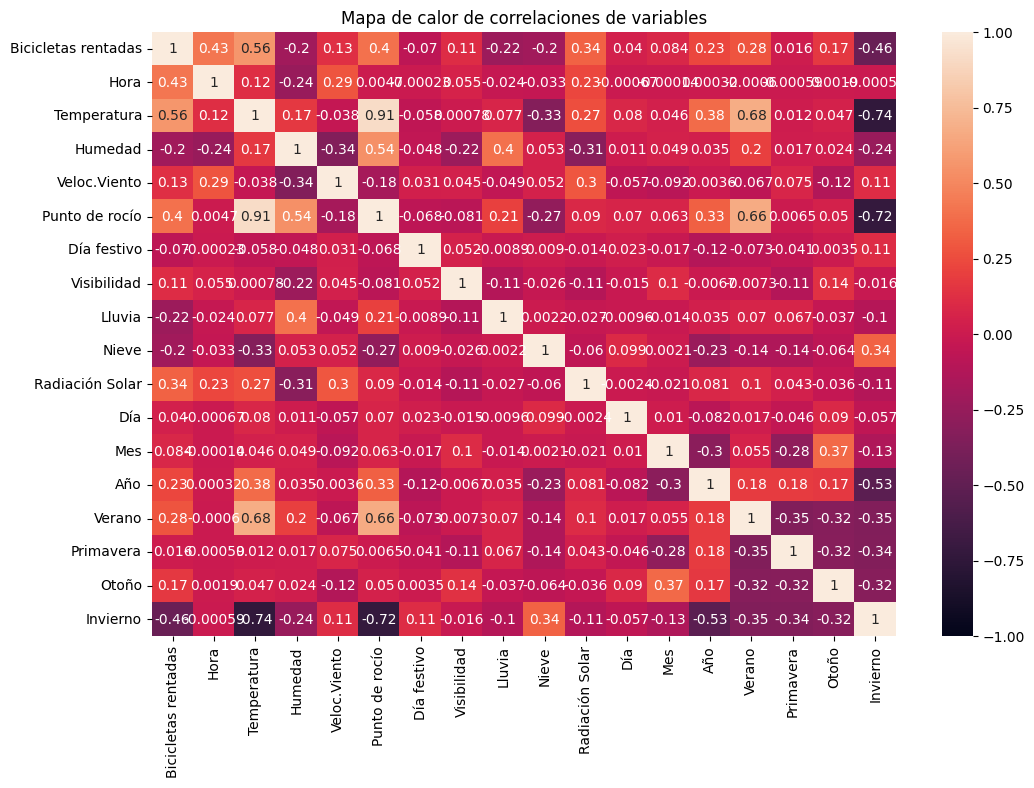

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1).set_title("Mapa de calor de correlaciones de variables")

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

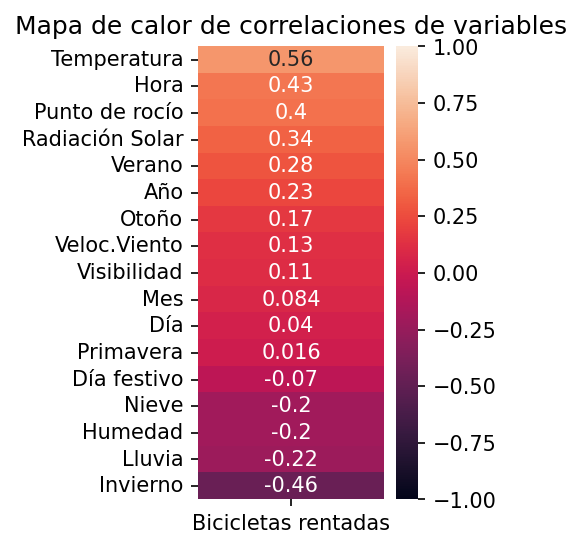

In [ ]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(df.corr()[["Bicicletas rentadas"]].sort_values("Bicicletas rentadas", ascending=False)[1:], annot=True, vmin=-1, vmax=1).set_title("Mapa de calor de correlaciones de variables")

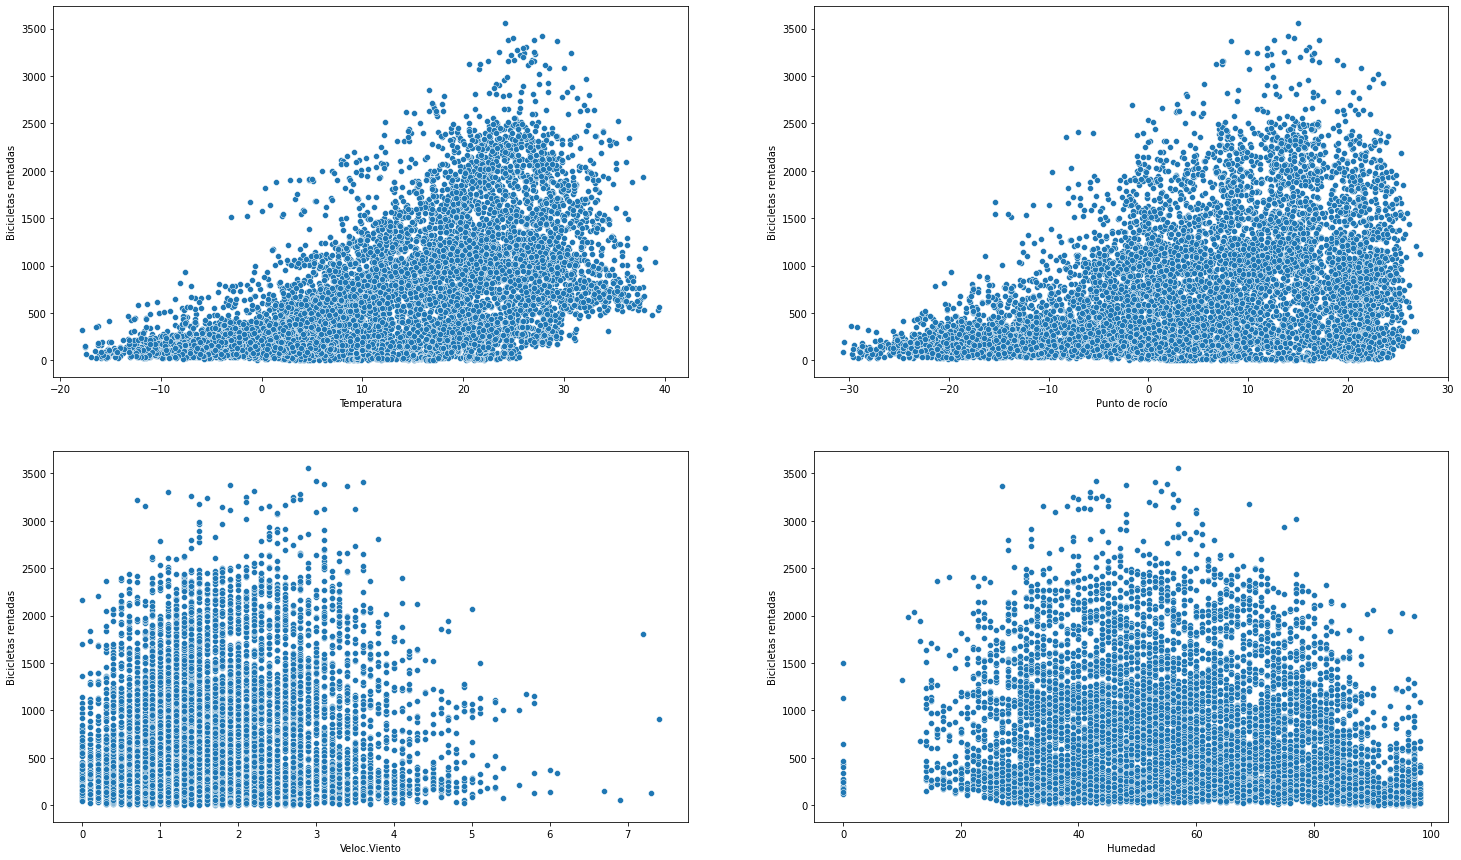

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2,squeeze=100, figsize=(25,15))
sns.scatterplot(x=df['Temperatura'], y=df['Bicicletas rentadas'], ax=axs[0,0]);

sns.scatterplot(x=df['Punto de rocío'], y=df['Bicicletas rentadas'], ax=axs[0,1]);

sns.scatterplot(x=df['Veloc.Viento'], y=df['Bicicletas rentadas'], ax=axs[1,0]);

sns.scatterplot(x=df['Humedad'], y=df['Bicicletas rentadas'], ax=axs[1,1]);


# Métodos de regresión

se establecen las variables independientes y la dependiente y la importación de bibliotecas 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df.drop('Bicicletas rentadas',axis=1)
y = df['Bicicletas rentadas']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3)

## Regresión lineal y polinomial
se realiza regresiones para detectar los scores con diferentes grados

In [ ]:
lr_1= LinearRegression()
lr_1.fit(X_training, y_training)

#scores
Train_lr_1 = lr_1.score(X_training, y_training)
Test_lr_1 = lr_1.score(X_test, y_test)
Crossval_lr_1 = np.sum(cross_val_score(lr_1, X, y)) / 5

print('\033[1m' + 'Regresión lineal' + '\033[0m')
print(f"R2 Train: {Train_lr_1}")
print(f"R2 Test: {Test_lr_1}")
print(f"Cross Val: {Crossval_lr_1}")

Regresión lineal
R2 Train: 0.56781117311054
R2 Test: 0.563065880655606
Cross Val: -0.7156411402968578


In [ ]:
poly_2 = PolynomialFeatures(degree=2)
Xtraind2 = poly_2.fit_transform(X_training)
Xtestd2 = poly_2.fit_transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(Xtraind2, y_training)

#scores
Train_lr_2 = lr_2.score(Xtraind2, y_training)
Test_lr_2 = lr_2.score(Xtestd2, y_test)
Crossval_lr_2 = np.sum(cross_val_score(lr_2, X, y)) / 5
print('\033[1m' + 'Regresión polinomial de segundo grado' + '\033[0m')
print(f"R2 Train: {Train_lr_2}")
print(f"R2 Test: {Test_lr_2}")
print(f"Cross Val: {Crossval_lr_2}")

Regresión polinomial de segundo grado
R2 Train: 0.7365809324749502
R2 Test: 0.707043455765098
Cross Val: -0.7156411402968578


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
Xtraind3 = poly_3.fit_transform(X_training)
Xtestd3 = poly_3.fit_transform(X_test)

lr_3 = LinearRegression()
lr_3.fit(Xtraind3, y_training)

#scores
Train_lr_3 = lr_3.score(Xtraind3, y_training)
Test_lr_3 = lr_3.score(Xtestd3, y_test)
Crossval_lr_3 = np.sum(cross_val_score(lr_3, X, y)) / 5

print('\033[1m' + 'Regresión polinomial de tercer grado' + '\033[0m')
print(f"R2 Train: {Train_lr_3}")

print(f"R2 Test: {Test_lr_3}")
print(f"Cross Val: {Crossval_lr_3}")

Regresión polinomial de tercer grado
R2 Train: 0.8418717729146621
R2 Test: 0.7527420996111455
Cross Val: -0.7156411402968578


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
Xtraind4 = poly_4.fit_transform(X_training)
Xtestd4 = poly_4.fit_transform(X_test)

lr_4 = LinearRegression()
lr_4.fit(Xtraind4, y_training)

#scores
Train_lr_4 = lr_4.score(Xtraind4, y_training)
Test_lr_4 = lr_4.score(Xtestd4, y_test)
Crossval_lr_4 = np.sum(cross_val_score(lr_4, X, y)) / 5

print('\033[1m' + 'Regresión polinomial de tercer grado' + '\033[0m')
print(f"R2 Train: {Train_lr_4}")

print(f"R2 Test: {Test_lr_4}")
print(f"Cross Val: {Crossval_lr_4}")

Regresión polinomial de tercer grado
R2 Train: 0.8971459053157281
R2 Test: -97.09022439355996
Cross Val: -0.7156411402968578


## Regresor de árboles de decisión
se procede a realizar la regresión por default y posteriormente se experimentará con los diferentes parámetros del regresoor de árboles de decisión:
criterion | splitter | max_depth | min_samples_split | min_samples_leaf | max_features | random_state | max_leaf_nodes

In [ ]:
DTR = DecisionTreeRegressor()
DTR.fit(X_training, y_training)

#scores
Train_DTR = DTR.score(X_training, y_training)
Test_DTR = DTR.score(X_test, y_test)
Crossval_DTR = np.sum(cross_val_score(DTR, X, y)) / 5

print('\033[1m' + 'Regresión de árboles de decisión: default' + '\033[0m')
print(f"R2 Train: {Train_DTR}")
print(f"R2 Test: {Test_DTR}")
print(f"Cross Val: {Crossval_DTR}")

Regresión de árboles de decisión: default
R2 Train: 1.0
R2 Test: 0.7373984014830006
Cross Val: 0.15405003016019173


In [ ]:
DTR1 = DecisionTreeRegressor(criterion="squared_error", splitter='best', max_depth=500, min_samples_split=30, min_samples_leaf=20, max_features="auto", random_state=1200,max_leaf_nodes=100000)
DTR1.fit(X_training, y_training)

#scores
Train_DTR1 = DTR1.score(X_training, y_training)
Test_DTR1 = DTR1.score(X_test, y_test)
Crossval_DTR1 = np.sum(cross_val_score(DTR1, X, y)) / 5

print('\033[1m' + 'Regresión de árboles de decisión: mod1' + '\033[0m')
print(f"R2 Train: {Train_DTR1}")
print(f"R2 Test: {Test_DTR1}")
print(f"Cross Val: {Crossval_DTR1}")

Regresión de árboles de decisión: mod1
R2 Train: 0.8588421116441775
R2 Test: 0.795663873351787
Cross Val: 0.4926744701495675


In [ ]:
DTR2 = DecisionTreeRegressor(criterion="friedman_mse", splitter='best', max_depth=60000, min_samples_split=5, min_samples_leaf=20, max_features="auto", random_state=1200,max_leaf_nodes=100)
DTR2.fit(X_training, y_training)

#scores
Train_DTR2 = DTR2.score(X_training, y_training)
Test_DTR2 = DTR2.score(X_test, y_test)
Crossval_DTR2 = np.sum(cross_val_score(DTR2, X, y)) / 5

print('\033[1m' + 'Regresión de árboles de decisión: mod2' + '\033[0m')
print(f"R2 Train: {Train_DTR2}")
print(f"R2 Test: {Test_DTR2}")
print(f"Cross Val: {Crossval_DTR2}")

Regresión de árboles de decisión: mod2
R2 Train: 0.8482358156440051
R2 Test: 0.790575119111727
Cross Val: 0.5082614097405938


In [ ]:
DTR3 = DecisionTreeRegressor(criterion="friedman_mse", splitter='best', max_depth=500, min_samples_split=30, min_samples_leaf=20, max_features="auto", random_state=1200,max_leaf_nodes=100000)
DTR3.fit(X_training, y_training)

#scores
Train_DTR3 = DTR2.score(X_training, y_training)
Test_DTR3 = DTR2.score(X_test, y_test)
Crossval_DTR3 = np.sum(cross_val_score(DTR3, X, y)) / 5

print('\033[1m' + 'Regresión de árboles de decisión: mod3' + '\033[0m')
print(f"R2 Train: {Train_DTR3}")
print(f"R2 Test: {Test_DTR3}")
print(f"Cross Val: {Crossval_DTR3}")

Regresión de árboles de decisión: mod3
R2 Train: 0.8482358156440051
R2 Test: 0.790575119111727
Cross Val: 0.4926744701495675


los parámetros más eficientes son los que se encuentran en la modificación no. 2


criterion="friedman_mse" | splitter='best'| max_depth=60000 | min_samples_split=5 | min_samples_leaf=20 | max_features="auto" | random_state=1200 | max_leaf_nodes=100

## Regresor Random Forest

se procede a realizar la regresión por default y posteriormente se experimentará con los diferentes parámetros del regresor de bosque aleatorio

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_training, y_training)

#scores
Train_RF = RF.score(X_training, y_training)
Test_RF = RF.score(X_test, y_test)
Crossval_RF = np.sum(cross_val_score(RF, X, y)) / 5

print('\033[1m' + 'Random Forest: Default' + '\033[0m')
print(f"R2 Train: {Train_RF}")
print(f"R2 Test: {Test_RF}")
print(f"Cross Val: {Crossval_RF}")

Random Forest: Default
R2 Train: 0.9821072222386911
R2 Test: 0.8670266086843895
Cross Val: 0.5000132422363059


In [ ]:
RF1 = RandomForestRegressor(n_estimators=150, criterion='squared_error',max_depth= 100,min_samples_split=3)
RF1.fit(X_training, y_training)

#scores
Train_RF1 = RF1.score(X_training, y_training)
Test_RF1 = RF1.score(X_test, y_test)
Crossval_RF1 = np.sum(cross_val_score(RF1, X, y)) / 5

print('\033[1m' + 'Random Forest: mod1' + '\033[0m')
print(f"R2 Train: {Train_RF1}")
print(f"R2 Test: {Test_RF1}")
print(f"Cross Val: {Crossval_RF1}")

Random Forest: mod1
R2 Train: 0.979690135621658
R2 Test: 0.8663435242952664
Cross Val: 0.49780778494534916


In [ ]:
RF2 = RandomForestRegressor(n_estimators=200, criterion='absolute_error',max_depth= 1000, min_samples_split=4, max_features= "log2")
RF2.fit(X_training, y_training)

#scores
Train_RF2 = RF2.score(X_training, y_training)
Test_RF2 = RF2.score(X_test, y_test)
Crossval_RF2 = np.sum(cross_val_score(RF2, X, y)) / 5

print('\033[1m' + 'Random Forest: mod2' + '\033[0m')
print(f"R2 Train: {Train_RF2}")
print(f"R2 Test: {Test_RF2}")
print(f"Cross Val: {Crossval_RF2}")

Random Forest: mod2
R2 Train: 0.9656433782651546
R2 Test: 0.8621084202859389
Cross Val: 0.520020014247873


In [ ]:
RF3 = RandomForestRegressor(n_estimators=130, criterion='absolute_error',max_depth= 100, min_samples_split=2, max_features= "log2")
RF3.fit(X_training, y_training)

#scores
Train_RF3 = RF3.score(X_training, y_training)
Test_RF3 = RF3.score(X_test, y_test)
Crossval_RF3 = np.sum(cross_val_score(RF3, X, y)) / 5

print('\033[1m' + 'Random Forest: mod3' + '\033[0m')
print(f"R2 Train: {Train_RF3}")
print(f"R2 Test: {Test_RF3}")
print(f"Cross Val: {Crossval_RF3}")

Random Forest: mod3
R2 Train: 0.9791562193924144
R2 Test: 0.8662524223817256
Cross Val: 0.5159877301631582


los parámetros más eficientes son los que se encuentran en la modificación no. 2:

n_estimators=200 | criterion='absolute_error' | max_depth= 1000 | min_samples_split=4 | max_features= "log2"

## Regresor de Marco de refuerzo de Gradiente (LightGBM Regressor)


se procede a realizar la regresión del método LightGBM en default y posteriormente se experimentará con los diferentes parámetros del regresor

In [ ]:
LGBMR = LGBMRegressor()
LGBMR.fit(X_training, y_training)

#scores
Train_LGBMR = LGBMR.score(X_training, y_training)
Test_LGBMR = LGBMR.score(X_test, y_test)
Crossval_LGBMR = np.sum(cross_val_score(LGBMR, X, y)) / 5

print('\033[1m' + 'Regresor Light GBM: Default' + '\033[0m')
print(f"R2 Train: {Train_LGBMR}")
print(f"R2 Test: {Test_LGBMR}")
print(f"Cross Val: {Crossval_LGBMR}")

Regresor Light GBM: Default
R2 Train: 0.9401962254941423
R2 Test: 0.8777333134470209
Cross Val: 0.6293050433368961


In [ ]:
LGBMR1 = LGBMRegressor(boosting_type="gbdt", num_leaves= 17, max_depth = -7, n_estimators =96)
LGBMR1.fit(X_training, y_training)

#scores
Train_LGBMR1 = LGBMR1.score(X_training, y_training)
Test_LGBMR1 = LGBMR1.score(X_test, y_test)
Crossval_LGBMR1 = np.sum(cross_val_score(LGBMR1, X, y)) / 5

print('\033[1m' + 'Regresor Light GBM: mod1' + '\033[0m')
print(f"R2 Train: {Train_LGBMR1}")
print(f"R2 Test: {Test_LGBMR1}")
print(f"Cross Val: {Crossval_LGBMR1}")

Regresor Light GBM: mod1
R2 Train: 0.91337828241071
R2 Test: 0.8723018538617854
Cross Val: 0.6582348096635295


## Red Neuronal


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
b_l0 = tf.keras.layers.Dense(units=128, input_shape=([X.shape[1]]), activation="relu")
b_l1 = tf.keras.layers.Dense(units=64, activation="relu")
b_l2 = tf.keras.layers.Dense(units=32, activation="relu")
b_l3 = tf.keras.layers.Dense(units=16, activation="relu")
b_l4 = tf.keras.layers.Dense(units=4, activation="relu")
b_l5 = tf.keras.layers.Dense(units=1)

In [ ]:
b_model = tf.keras.Sequential([b_l0, b_l1, b_l2, b_l3, b_l4, b_l5])

In [ ]:
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history = b_model.fit(X_training, y_training, epochs=250, verbose=True, validation_split=0.3)

Epoch 1/250
130/130 [==============================] - 1s 7ms/step - loss: 46058.8125 - val_loss: 58873.2383
Epoch 2/250
130/130 [==============================] - 1s 4ms/step - loss: 45641.3125 - val_loss: 54932.8125
Epoch 3/250
130/130 [==============================] - 1s 4ms/step - loss: 42545.2656 - val_loss: 54368.0039
Epoch 4/250
130/130 [==============================] - 0s 4ms/step - loss: 45806.5156 - val_loss: 74888.5625
Epoch 5/250
130/130 [==============================] - 0s 3ms/step - loss: 45687.4922 - val_loss: 57991.6523
Epoch 6/250
130/130 [==============================] - 1s 4ms/step - loss: 45644.8398 - val_loss: 57070.6172
Epoch 7/250
130/130 [==============================] - 1s 4ms/step - loss: 44784.7461 - val_loss: 59429.6875
Epoch 8/250
130/130 [==============================] - 0s 3ms/step - loss: 45768.4805 - val_loss: 52712.6836
Epoch 9/250
130/130 [==============================] - 1s 4ms/step - loss: 44776.0938 - val_loss: 55122.0625
Epoch 10/250
130/13

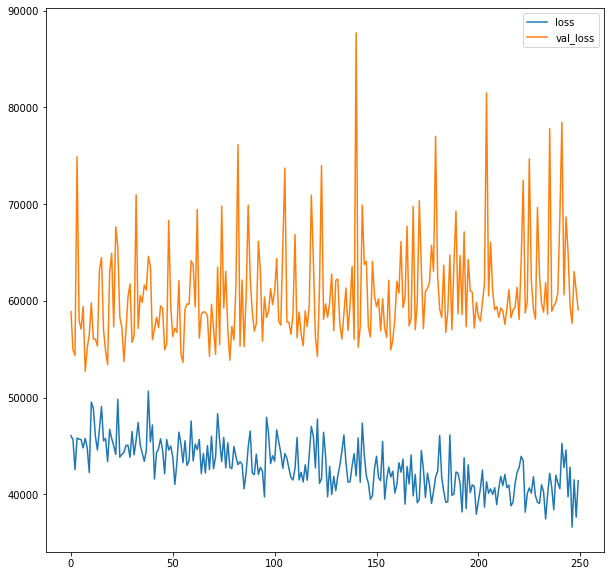

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right");

In [ ]:
y_predict = b_model.predict(X_test)[:,0]

In [ ]:
y_predictLGBMR1 =LGBMR1.predict(X_test)

In [ ]:
y_predict.shape

(2540,)

In [ ]:
y_predictLGBMR1.shape

(2540,)

In [ ]:
#scores
Train_b_model = b_model.score(X_training, y_training)
Test_b_model = b_model.score(X_test, y_test)
Crossval_b_model = np.sum(cross_val_score(b_model, X, y)) / 5

print('\033[1m' + 'Regresor Light GBM: Default' + '\033[0m')
print(f"R2 Train: {Train_b_model}")
print(f"R2 Test: {Test_b_model}")
print(f"Cross Val: {Crossval_b_model}")

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.8613546596466405

#Modelo de Predicción

(0.0, 3500.0)

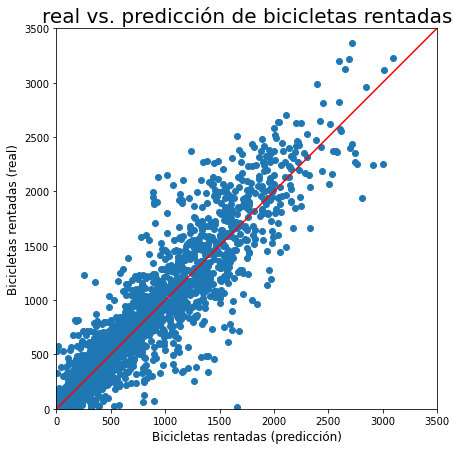

In [ ]:
x = np.linspace(0,3500,10)
y = x

plt.figure(figsize=(7,7))

plt.scatter(y_predict, y_test)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Bicicletas rentadas (predicción)', size=12)
plt.ylabel('Bicicletas rentadas (real)', size=12)
plt.title('real vs. predicción de bicicletas rentadas', size=20)
plt.xlim(0,3500)
plt.ylim(0,3500)

In [ ]:
def prediction(data):
  X_input = pd.DataFrame([data], columns = df.columns[1:])
  y_input = b_model.predict(X_input)[:,0]
  return y_input[0]

In [ ]:
Hora = 20
Temperatura = 25    # °C
Humedad = 93        # % de humedad
Veloc_Viento = 6    # m-s
Punto_de_rocío = 10 # °C
Día_festivo = 0     # 1 es día festivo / 0 no es día festivo
Visibilidad = 1     # 1 hay visibilidad / 0 poca o nula visibilidad
Lluvia = 1          # 1 llueve / 0 no llueve
Nieve = 0           # 1 neva/ 0 no neva
Rad_Solar = 0       # 1 hay radiación / 0 no hay radiación
Día = 12            # 1-31
Mes = 7             # 1-12
Año = 2022          # Año
Verano = 1          # 1 es verano / 0 no es verano
Primavera = 0       # 1 es Primavera / 0 no es Primavera
Otoño = 0           # 1 es Otoño / 0 no es Otoño
Invierno = 0        # 1 es Invierno / 0 no es Invierno

data = [Hora, Temperatura, Humedad, Veloc_Viento, Punto_de_rocío, Día_festivo, Visibilidad, Lluvia, Nieve, Rad_Solar, Día, Mes, Año, Verano, Primavera, Otoño, Invierno]
round(prediction(data),0)

57.0